## Time Series - Dock 152 

In [1]:
import pandas as pd
from matplotlib import pyplot
import pandas.tools.plotting as ts
import statsmodels.graphics.tsaplots as tsa
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
dataDir = r"C:/Ramya Dhatri/Intro To Data Science/Project/Dock/Dock_152/"
train_df = pd.read_csv(dataDir+'train_152.csv', sep='\t')
test_df = pd.read_csv(dataDir+'test_152.csv', sep='\t')
train_df.avail_bikes = train_df.avail_bikes.astype(float)
test_df.avail_bikes = test_df.avail_bikes.astype(float)
train_series = pd.Series(train_df['avail_bikes'].values, index=train_df['timestamp'])
test_series = pd.Series(test_df['avail_bikes'].values, index=test_df['timestamp'])

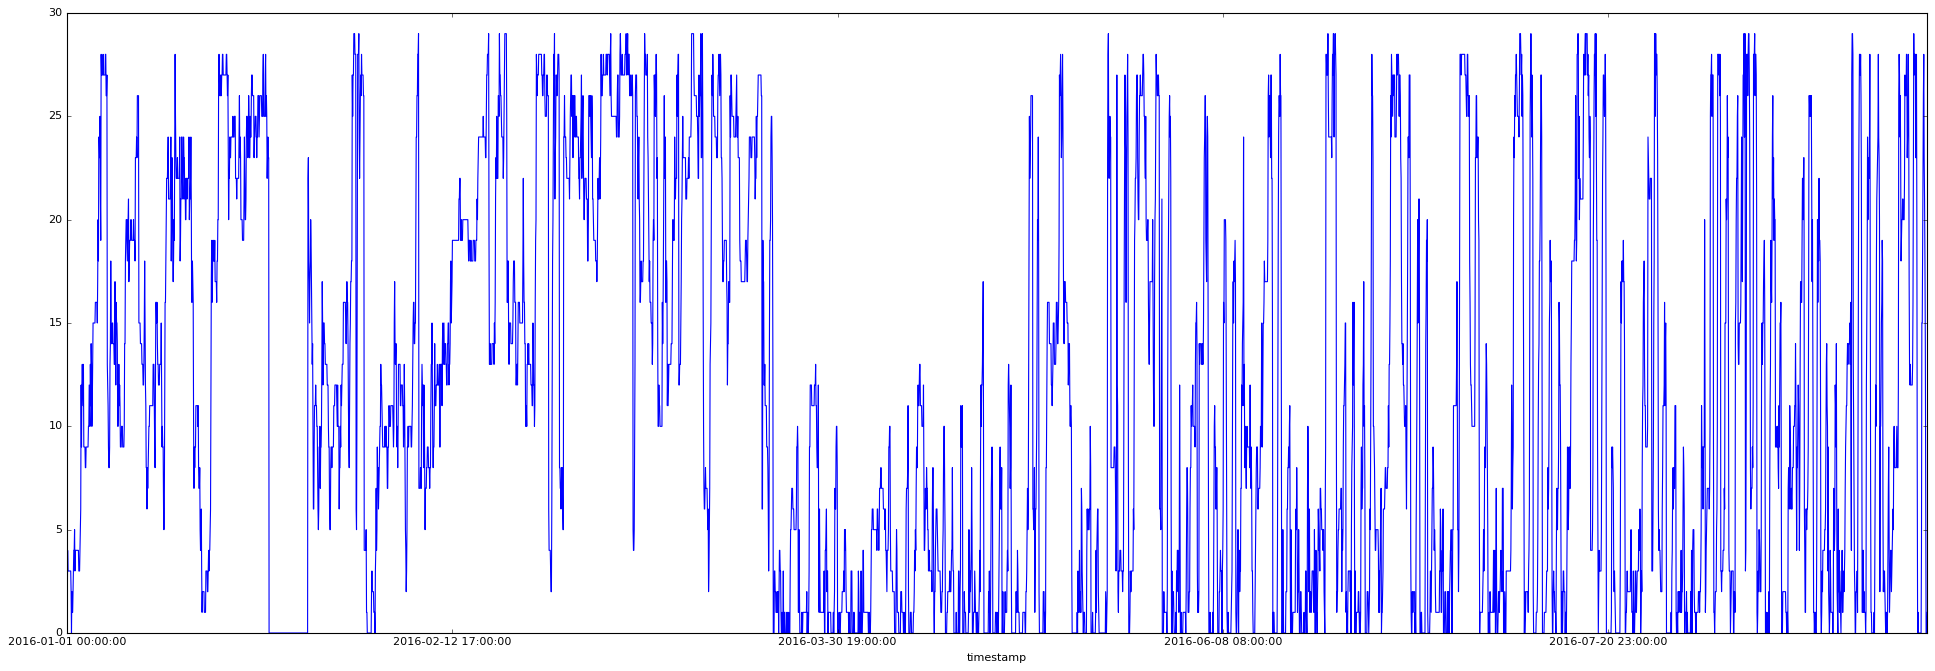

In [3]:
pyplot.figure(figsize=(30,10))
train_series.plot()
pyplot.show()

In [ ]:
train_series_diff1 = train_series.diff()
train_series_diff2 = train_series_diff1.diff()
pyplot.figure(figsize=(30,10))
train_series_diff1.plot()
pyplot.show()

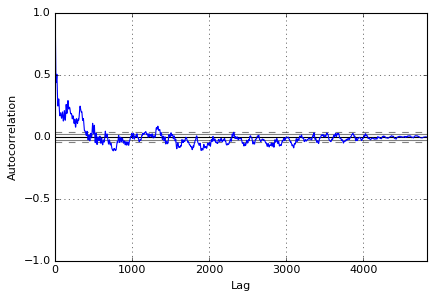

In [4]:
ts.autocorrelation_plot(train_series)
pyplot.show()

It can be seen that the ACF plot has positive correlation at lag 1. Also, it alternates between positive and negative values and finally decays to zero. Hence, an AR model would be suitable for this data.

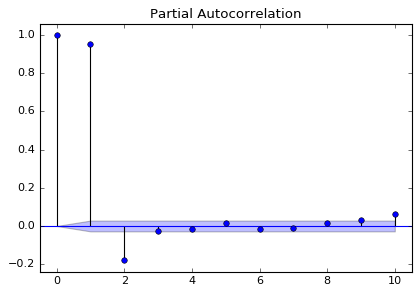

In [8]:
tsa.plot_pacf(train_series, lags=10)
pyplot.show()

As only 4 lags are significant in the PACF plot, we go ahead with fitting an AR(4) model.

predicted=2.162138, expected=1.000000
predicted=1.995877, expected=0.000000
predicted=0.865518, expected=1.000000
predicted=2.087275, expected=0.000000
predicted=0.818285, expected=0.000000
predicted=0.984280, expected=0.000000
predicted=0.948800, expected=0.000000
predicted=0.968369, expected=0.000000
predicted=0.957069, expected=0.000000
predicted=0.945972, expected=0.000000
predicted=0.935069, expected=0.000000
predicted=0.924353, expected=1.000000
predicted=2.024620, expected=1.000000
predicted=1.861147, expected=2.000000
predicted=2.955202, expected=6.000000
predicted=7.204674, expected=9.000000
predicted=9.908699, expected=10.000000
predicted=10.495079, expected=12.000000
predicted=12.415715, expected=16.000000
predicted=16.450200, expected=18.000000
predicted=18.014131, expected=10.000000
predicted=8.735859, expected=10.000000
predicted=9.833823, expected=1.000000
predicted=-0.160454, expected=2.000000
predicted=2.556367, expected=2.000000
predicted=2.482553, expected=0.000000
p

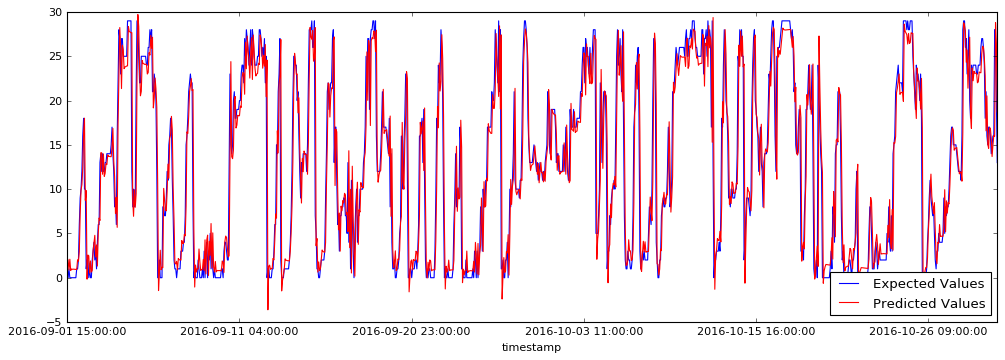

In [6]:
history = [x for x in train_series]
predictions = list()
for t in range(len(test_series)):
    model = ARIMA(history, order=(4,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_series[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_series, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.figure(figsize=(15,5))
test_series.plot(color = 'blue', label = 'Expected Values')
pyplot.plot(predictions, color='red', label = 'Predicted Values')
pyplot.legend(loc = 'lower right')
pyplot.show()
# 3 - 16.739
# (4,1,1) - 16.707

In [10]:
output_df = pd.DataFrame(columns=['DockID', 'Predicted', 'Expected', 'Predicted_Bin', 'Expected_Bin'])
for t in range(len(test_series)):
    pred = 0
    expect = 0
    if predictions[t] <= 5:
        pred = 1
    if test_series[t] <= 5:
        expect = 1
    output_df.loc[t] = ['152', predictions[t][0], test_series[t], pred, expect]
    
output_df.to_csv('output_152.csv', sep='\t')

output_df

DockID  Predicted  Expected  Predicted_Bin  Expected_Bin
0       152   2.162138       1.0            1.0           1.0
1       152   1.995877       0.0            1.0           1.0
2       152   0.865518       1.0            1.0           1.0
3       152   2.087275       0.0            1.0           1.0
4       152   0.818285       0.0            1.0           1.0
5       152   0.984280       0.0            1.0           1.0
6       152   0.948800       0.0            1.0           1.0
7       152   0.968369       0.0            1.0           1.0
8       152   0.957069       0.0            1.0           1.0
9       152   0.945972       0.0            1.0           1.0
10      152   0.935069       0.0            1.0           1.0
11      152   0.924353       1.0            1.0           1.0
12      152   2.024620       1.0            1.0           1.0
13      152   1.861147       2.0            1.0           1.0
14      152   2.955202       6.0            1.0           0.0
15      152   7.204674       9.0            0.0           0.0
16      152   9.908699      10.0            0.0           0.0
17      152  10.495079      12.0            0.0           0.0
18      152  12.415715      16.0            0.0           0.0
19      152  16.450200      18.0            0.0           0.0
20      152  18.014131      10.0            0.0           0.0
21      152   8.735859      10.0            0.0           0.0
22      152   9.833823       1.0            0.0           1.0
23      152  -0.160454       2.0            1.0           1.0
24      152   2.556367       2.0            1.0           1.0
25      152   2.482553       0.0            1.0           1.0
26      152   0.519791       1.0            1.0           1.0
27      152   1.892455       0.0            1.0           1.0
28      152   0.640435       0.0            1.0           1.0
29      152   0.835091       2.0            1.0           1.0
...     ...        ...       ...            ...           ...
1051    152  23.670197      23.0            0.0           0.0
1052    152  22.236722      24.0            0.0           0.0
1053    152  23.316406      24.0            0.0           0.0
1054    152  23.080497      24.0            0.0           0.0
1055    152  23.089432      24.0            0.0           0.0
1056    152  23.070674      23.0            0.0           0.0
1057    152  22.004869      23.0            0.0           0.0
1058    152  22.119702      24.0            0.0           0.0
1059    152  23.229711      24.0            0.0           0.0
1060    152  23.158766      24.0            0.0           0.0
1061    152  23.139523      26.0            0.0           0.0
1062    152  25.269633      27.0            0.0           0.0
1063    152  26.140320      27.0            0.0           0.0
1064    152  25.988714      26.0            0.0           0.0
1065    152  24.841922      24.0            0.0           0.0
1066    152  22.781553      18.0            0.0           0.0
1067    152  16.581871      21.0            0.0           0.0
1068    152  20.534415      16.0            0.0           0.0
1069    152  15.070587      15.0            0.0           0.0
1070    152  14.609643      17.0            0.0           0.0
1071    152  16.920867      17.0            0.0           0.0
1072    152  16.876678      16.0            0.0           0.0
1073    152  15.777029      14.0            0.0           0.0
1074    152  13.680963      15.0            0.0           0.0
1075    152  14.994852      16.0            0.0           0.0
1076    152  16.045885      16.0            0.0           0.0
1077    152  15.968329      28.0            0.0           0.0
1078    152  28.802275      27.0            0.0           0.0
1079    152  26.437668      20.0            0.0           0.0
1080    152  18.706319      13.0            0.0           0.0

[1081 rows x 5 columns]